In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)  # (width, height) in inches
from mzsql import *

### Extract via `mzapy` package

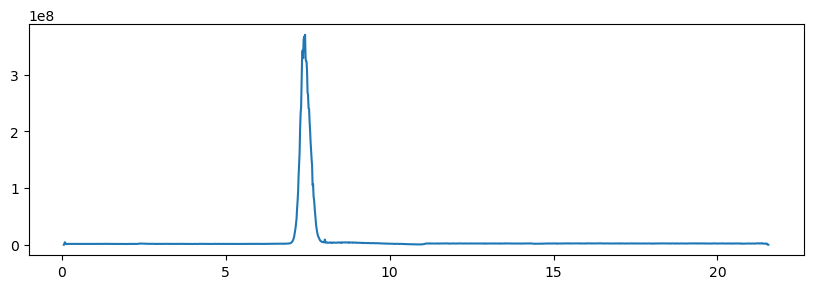

In [2]:
chrom_data = get_chrom_mzapy('../demo_data/180205_Poo_TruePoo_Full1.mza', 118.0865, 10)
plt.plot(chrom_data["rt"], chrom_data["int"])

<StemContainer object of 3 artists>

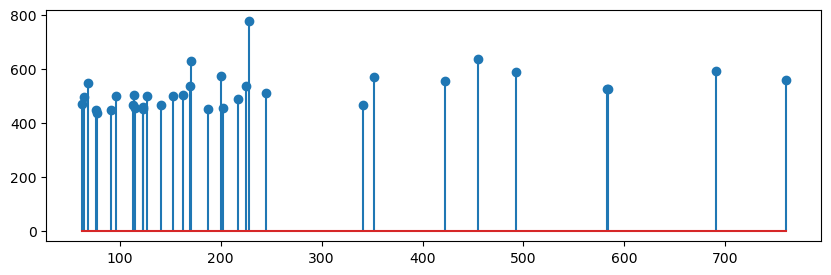

In [3]:
spec_data = get_spec_mzapy("../demo_data/180205_Poo_TruePoo_Full1.mza", 1)
plt.stem(spec_data["mz"], spec_data["int"])

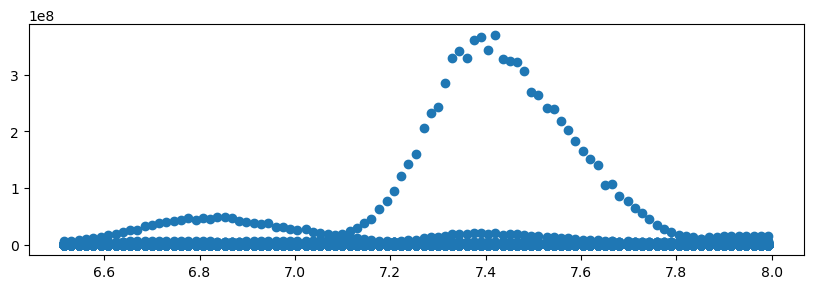

In [4]:
rtrange_data = get_rtrange_mzapy("../demo_data/180205_Poo_TruePoo_Full1.mza", 6.5, 8)
plt.scatter(rtrange_data["rt"], rtrange_data["int"])

### Extract via HDF5 methods

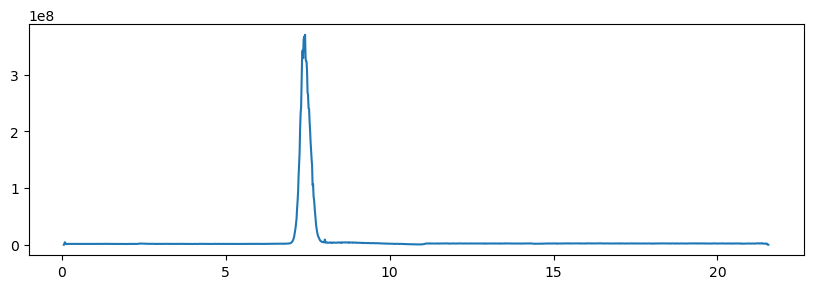

In [5]:
chrom_data = get_chrom_mza('../demo_data/180205_Poo_TruePoo_Full1.mza', 118.0865, 10)
plt.plot(chrom_data["rt"], chrom_data["int"])

<StemContainer object of 3 artists>

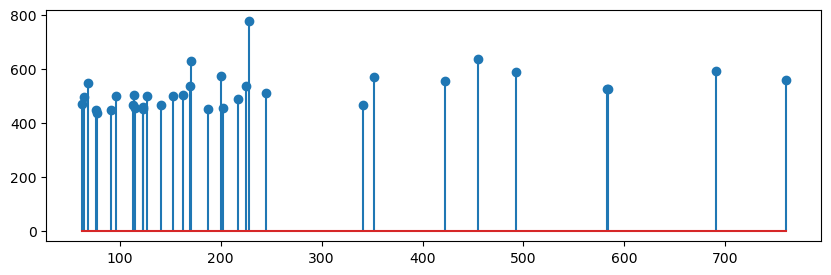

In [6]:
spec_data = get_spec_mza("../demo_data/180205_Poo_TruePoo_Full1.mza", 1)
plt.stem(spec_data["mz"], spec_data["int"])

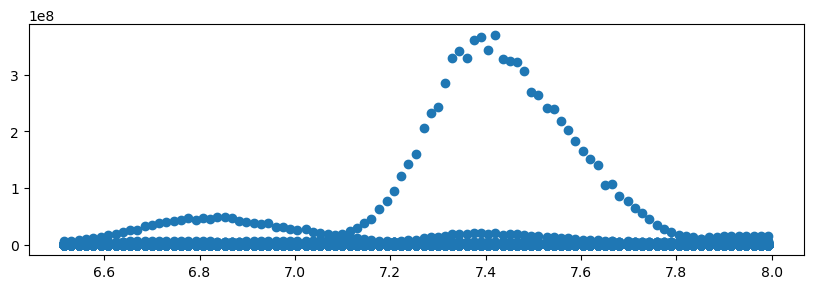

In [7]:
rtrange_data = get_rtrange_mza("../demo_data/180205_Poo_TruePoo_Full1.mza", 6.5, 8)
plt.scatter(rtrange_data["rt"], rtrange_data["int"])

### Timing things

In [8]:
import timeit

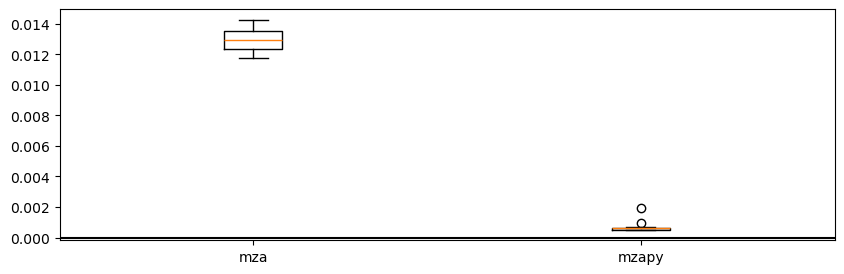

In [9]:
mza_spec = timeit.repeat('get_spec_mzapy("../demo_data/180205_Poo_TruePoo_Full1.mza", 1)', globals=globals(), number=1, repeat=10)
mzapy_spec = timeit.repeat('get_spec_mza("../demo_data/180205_Poo_TruePoo_Full1.mza", 1)', globals=globals(), number=1, repeat=10)
plt.boxplot([mza_spec, mzapy_spec], tick_labels=["mza", "mzapy"])
plt.axhline(y=0, color="k")

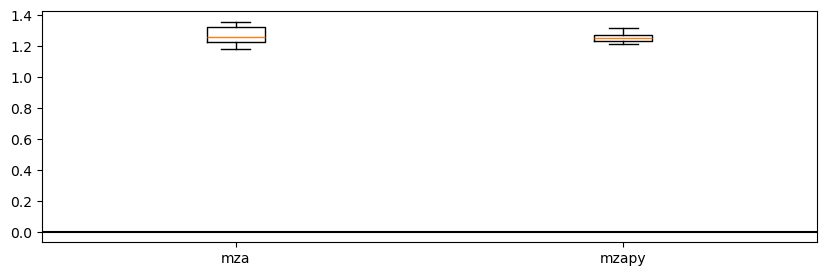

In [10]:
mza_chrom = timeit.repeat('get_chrom_mzapy("../demo_data/180205_Poo_TruePoo_Full1.mza", 118.0865, 10)', globals=globals(), number=1, repeat=10)
mzapy_chrom = timeit.repeat('get_chrom_mza("../demo_data/180205_Poo_TruePoo_Full1.mza", 118.0865, 10)', globals=globals(), number=1, repeat=10)
plt.boxplot([mza_chrom, mzapy_chrom], tick_labels=["mza", "mzapy"])
plt.axhline(y=0, color="k")

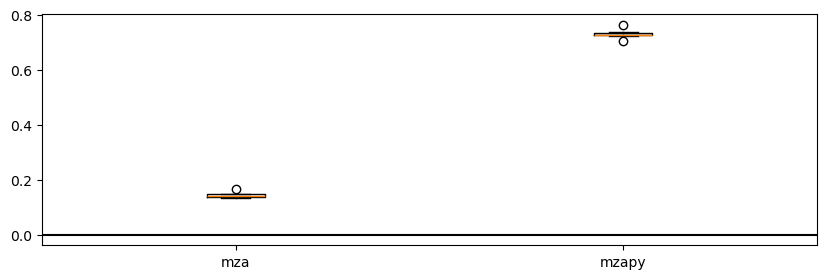

In [11]:
mza_rtrange = timeit.repeat('get_rtrange_mzapy("../demo_data/180205_Poo_TruePoo_Full1.mza", 6.5, 8)', globals=globals(), number=1, repeat=10)
mzapy_rtrange = timeit.repeat('get_rtrange_mza("../demo_data/180205_Poo_TruePoo_Full1.mza", 6.5, 8)', globals=globals(), number=1, repeat=10)
plt.boxplot([mza_rtrange, mzapy_rtrange], tick_labels=["mza", "mzapy"])
plt.axhline(y=0, color="k")

In [12]:
import pandas as pd
rtrange_df = pd.DataFrame({
    "method": ["mza"]*10 + ["mzapy"]*10,
    "time": mza_rtrange + mzapy_rtrange
})
rtrange_df["metric"] = "rtrange"
spec_df = pd.DataFrame({
    "method": ["mza"]*10 + ["mzapy"]*10,
    "time": mza_spec + mzapy_spec
})
spec_df["metric"] = "spec"
chrom_df = pd.DataFrame({
    "method": ["mza"]*10 + ["mzapy"]*10,
    "time": mza_chrom + mzapy_chrom
})
chrom_df["metric"] = "chrom"

complete_timings = pd.concat([spec_df, chrom_df, rtrange_df], ignore_index=True)
complete_timings["datetime"] = pd.to_datetime('now')
complete_timings.to_csv("compiled_timings.csv", mode='a', index=False, header=False)